# Google Drive'ın mount edilmesi

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Gerekli kütüphanelerin import edilmesi

In [2]:

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Verilerin yüklenmesi

In [3]:
path = "/content/drive/MyDrive/Colab Notebooks/spectrograms/"

import glob
datasets = glob.glob("/content/drive/MyDrive/Colab Notebooks/spectrograms/*/*.png")

# Verilerin listelenmesi ve liste boyutunun yazdırılması

In [4]:
len(list(datasets))

8732

# Örnek olarak bir verinin görüntülenmesi

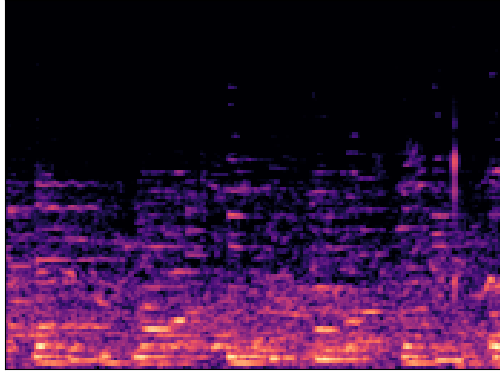

In [5]:
PIL.Image.open(str(datasets[0]))

# Veri setinin train, test ve validation olarak bölünmesi

In [6]:
#Train veri setinin oluşturulması
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    labels = 'inferred',
    label_mode='int',
    seed=123,
    color_mode ='grayscale',  #Grayscale dönüşümü
    image_size=(180, 180),  #Resizing
    batch_size=32, 
    shuffle=True)

train_ds

Found 8732 files belonging to 10 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [7]:
#Train veri setinin boyutlarının yazdırılması
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 1)
(32,)


In [8]:
#Train veri setinin sınıf isimlerinin yazdırılması
train_ds.class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [9]:
#Test veri setinin oluşturulması
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    labels = 'inferred',
    label_mode='int',
    seed=123,
    color_mode ='grayscale', #Grayscale dönüşümü
    image_size=(180, 180),  #Resizing
    batch_size=32, 
    shuffle=True)

test_ds

Found 8732 files belonging to 10 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:
# Validation veri setinin oluşturulması
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    labels = 'inferred',
    label_mode='int',
    seed=123,
    color_mode ='grayscale',  #Grayscale dönüşümü
    validation_split=0.1,
    subset="validation",
    image_size=(180, 180), #Resizing
    batch_size=32)

val_ds

Found 8732 files belonging to 10 classes.
Using 873 files for validation.


<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
#Normalizasyon işlemlerinin yapılması
normalization_layer = layers.Rescaling(1./255)


normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0
